<a href="https://colab.research.google.com/github/JjMyDamnSon/AI_sub/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Salma Nabil

ID: 55-24584

Tutorial: T02

---

Name: Farah Emad

ID: 55-9810

Tutorial: T02

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
# plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
# #create a correlation matrix to as a heatmap to check correlation between the independent variables and the target variab
# from scipy.stats import chi2_contingency


# def cramers_v(confusion_matrix):
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     r, k = confusion_matrix.shape
#     return np.sqrt(chi2 / (n * (min(k-1, r-1))))


# categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


# cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
#                                 index=categorical_columns, columns=categorical_columns)


# for col1 in categorical_columns:
#     for col2 in categorical_columns:
#         if col1 == col2:
#             cramers_v_matrix.loc[col1, col2] = 1.0
#         else:
#             confusion_matrix = pd.crosstab(df[col1], df[col2])
#             cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)


# plt.figure(figsize=(10, 8))
# sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
# plt.title("Cramér's V Heatmap of Categorical Variables")
# plt.show()

In [ ]:
#check for null values
n = df.isnull().sum()
print(n)

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64


In [ ]:
#check for null values by checking all unique valeus
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("-----------------------------------------------------")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("-----------------------------------------------------")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


## Data Cleaning

**Feature Selection**

'customerID' attribute is dropped given that it is just the unique identifier for each customer and has no relevence to the churn prediction

In [2]:
#drop the customerID attribute
df = df.drop('customerID', axis =1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


'TotalCharges' is dropped given that it can be deduced that TotalCharges is a result of Tenure * Monthly Charges so it can already be derived from these two attributes. If 'TotalCharges' was kept and the other two were dropped,the modelwould view a customer who spent lots in a few month as an equal to another who have spent the same amount but over years. Addionally, by dropping TotalCharges, the model shows higher accuracy, precision, recall and f score can be noted.

In [3]:
#drop the TotalCharges attribute
df = df.drop('TotalCharges', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,Yes


**Data Transformation**

In [4]:
#extract the float value from the values of 'MonthlyCharge' attribute
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract(r'(\d+\.\d+|\d+)')
# df['TotalCharges'] = df['TotalCharges'].str.extract(r'(\d+\.\d+|\d+)')

#convert the attribute data type to int
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
# df['TotalCharges'] = df['TotalCharges'].astype(float)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


**Replace Missing Values**

In [ ]:
# #replace missing value in 'TotalCharges' with mean value
# df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# df.isnull().sum()

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

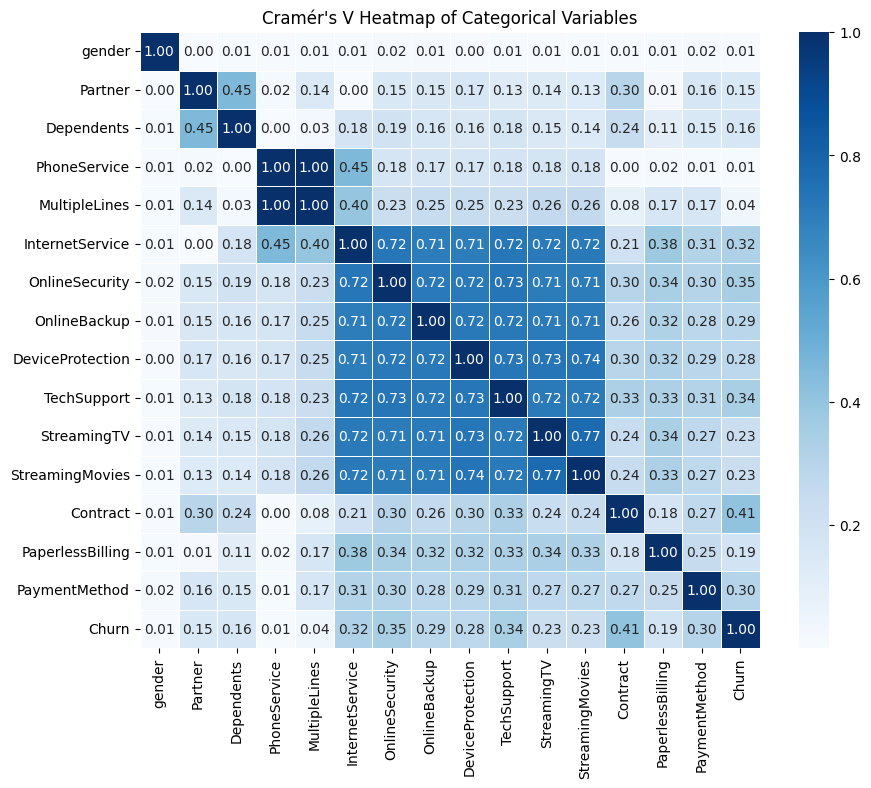

In [5]:
#creamer v to check correlation between categorical attributes and Churn
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))


categorical_columns = ['gender', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']


cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)


for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()

**Encode 'Churn' Attribute to Convert it to a Numeric Attribute**

In [6]:
#encode 'Churn' attribute
df['Churn'] = df['Churn'].astype('category').cat.codes

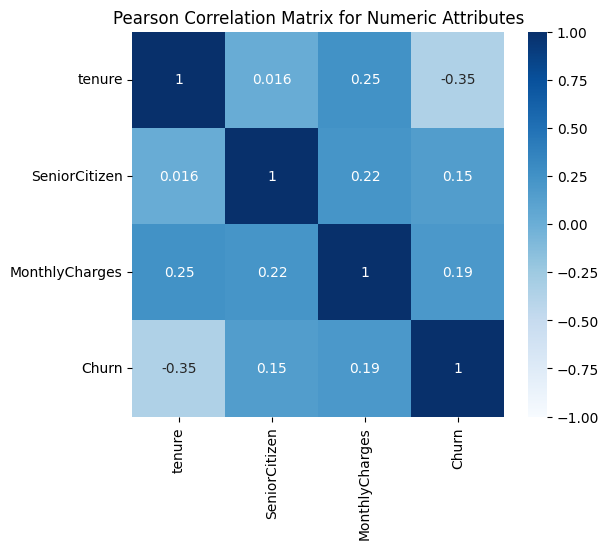

In [7]:
#Pearson Correlation for numerical values and Churn
columns = ['tenure','SeniorCitizen','MonthlyCharges','Churn']
correlation = df[columns].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix for Numeric Attributes")
plt.show()

**Answer for Q1**: Since the dataset includes both numerical and categorical independent variables/ attributes. Pearson correlation was used to imply the correlation between numerical ones and Churn while Cremer's V was used for categorical ones.

Accordingly, the most correlated numerical attributes is 'Tenure' at approx. -0.35 implying that relatively weak negative correlation to 'Churn'. Whereas the the most correlated categorical attributes is 'Contract' at approx 0.41 implying that relatively weak positive correlation to 'Churn'

**Q2: Which payment method has the highest churn rate?**

**Visualization**

PaymentMethod
Electronic check             0.452854
Mailed check                 0.192020
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Name: Churn, dtype: float64


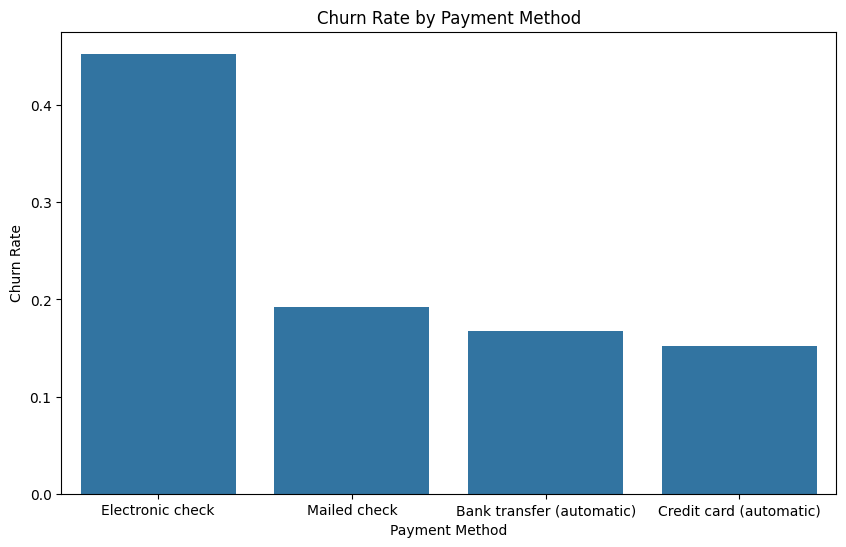

In [8]:
# Group by payment method and calculate churn rate
churn_by_payment_method = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)

# Display churn rates
print(churn_by_payment_method)

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

plt.show()

**Answer for Q2**: Electronic Check has the highest churn rate at approx. 45%

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

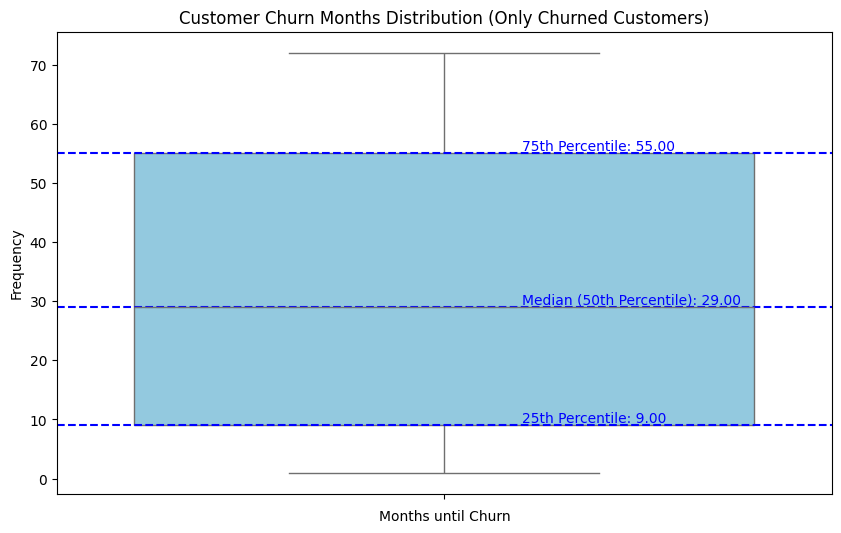

In [32]:
churned_customers = df[df['Churn'] == 1]

percentiles = np.percentile(churned_customers['tenure'], [25, 50, 75])

# Vertical box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=churned_customers['tenure'], color='skyblue')

# Title and labels
plt.title('Customer Churn Months Distribution (Only Churned Customers)')
plt.xlabel('Months until Churn')
plt.ylabel('Frequency')

# Add percentile lines to the box plot for clarity
for p, label in zip(percentiles, ['25th Percentile', 'Median (50th Percentile)', '75th Percentile']):
    plt.axhline(p, color='blue', linestyle='--')
    plt.text(0.1, p, f'{label}: {p:.2f}', rotation=0, verticalalignment='bottom', color='blue')

plt.show()


**Answer for Q3**: The box plot indicates that 25% of customers who churned abandoned the company after 2 months, 50% after 10 months and 75% after 29 months. So we can assume customers would typically churn after 10 months.

**Check for class imbalance**

In [31]:
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


## Data Preparation for Modelling

In [34]:
df_encoded = df.copy()

**The values in 'Contract' can be ranked/ ordinal values**

In [35]:
#specify categories in 'Contract' attribute
df_encoded['Contract'] = pd.Categorical(df_encoded['Contract'], categories=['Month-to-month','One year','Two year'], ordered=True)
df_encoded.head()

#specify binary comparission to mid value: 'One year'
df_encoded[df_encoded['Contract'] <= 'One year']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,0
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,0


**Perform One-Hot Encoding to the categorical attributes**

In [36]:
#encode while preserve order of each category of 'Contract'
#df_encoded['Contract'] = df_encoded['Contract'].cat.codes
#df_encoded['Contract']

#encode remaining categorical variables

#df_encoded = pd.get_dummies(df_encoded, columns=categorical_attributes.columns)
#df_encoded.info()
# Assuming 'df' is your original dataframe

# 1. Identify Categorical Attributes:
categorical_attributes = df.select_dtypes(include=['object']).columns

# 2. Create a Copy of the Dataframe:
df_encoded = df.copy()

# 3. Perform One-Hot Encoding:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_attributes)


**Remove Redundant Binary Columns**

In [37]:
# df_encoded.drop(['Partner_No','Dependents_No', 'gender_Female','PaperlessBilling_No','PhoneService_No'], axis='columns', inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   int8   
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 no

## Modelling

**Split the Dataset tnto 70% - 30%, Training - Testing**

In [38]:
from sklearn.model_selection import train_test_split

#X = df_encoded.drop('Churn', axis=1)
#y = df_encoded['Churn']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df_encoded['Churn']              # Target variable ('Churn')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



**Build Decision Tree Model**

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
# graph


## Evaluation

**Calculate Accuracy, Precision, Recall and Harmonic Mean for the training and testing datasets**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("_______________________________________________")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
_______________________________________________
Accuracy Score: 71.61%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.814987    0.468439  0.716114     0.641713      0.722848
recall        0.793415    0.502674  0.716114     0.648044      0.716114
f1-score      0.804056    0.484953  0.716114     0.644504      0.719214
support    1549.000000  561.000000  0.716114  2110.000000   2110.000000
_______________________________________________
Confusion Matrix: 
 [[1229  320]
 [ 279  282]]



In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('_______________________________________________')
print('Recall: ',recall_score(y_test,pred))
print('_______________________________________________')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4684385382059801
_______________________________________________
Recall:  0.5026737967914439
_______________________________________________
F1_score:  0.48495270851246775


**Stratified k-fold Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# by trial and error using values (3-10), 3 yeilds the highest f score
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.50566893, 0.50782998, 0.48098434])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.50 (+/- 0.02)


The resulting f-score of the k-folds cross validation is noted to be low which could be an indicator the paratemers of the tree need to be tuned
**Re-Evaluating After Setting Tree Parameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 10)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Test Result:
Accuracy Score: 74.64%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.848214    0.519878  0.746445     0.684046      0.760917
recall        0.797289    0.606061  0.746445     0.701675      0.746445
f1-score      0.821963    0.559671  0.746445     0.690817      0.752226
support    1549.000000  561.000000  0.746445  2110.000000   2110.000000
_______________________________________________
Confusion Matrix: 
 [[1235  314]
 [ 221  340]]



In [ ]:
pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('_______________________________________________')
print('Recall: ',recall_score(y_test,pred))
print('_______________________________________________')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.5198776758409785
Recall:  0.6060606060606061
F1_score:  0.5596707818930041


## Bonus (Optional)

Logistic Regression can be used as an alternative classification method since the independent variable is in binary and the independent variables (after encoding) are numerical

Normalize numeric continous independent variables

In [42]:
numerical_columns = ['tenure', 'MonthlyCharges']


df_encoded[numerical_columns] = (

    df_encoded[numerical_columns] - df_encoded[numerical_columns].min()

) /(

    df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min()
)


df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,0.464789,0.385075,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,0.014085,0.354229,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,0.619718,0.239303,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,0.014085,0.521891,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


Convert boolean independent variables into 0, 1 (numeric attributes)

In [48]:
X= X.astype(int)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,0.464789,0.385075,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,0.014085,0.354229,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,0.619718,0.239303,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,0.014085,0.521891,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


Build the Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix:
[[1382  167]
 [ 261  300]]
Accuracy Score: 0.7971563981042654
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Precision: 0.6423982869379015
Recall: 0.5347593582887701
F1-Score: 0.5836575875486382
Accuracy Score: 0.7971563981042654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision, Recall, and F1-Score for class 1 (True/Churn)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print individual metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix:
[[1382  167]
 [ 261  300]]
Accuracy Score: 0.7971563981042654
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Precision: 0.6423982869379015
Recall: 0.5347593582887701
F1-Score: 0.5836575875486382
Accuracy Score: 0.7971563981042654
